# View IR images of IRCAM at CTIO
=======================================

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- date   : Jun 16th  2017

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math as m
import re
import os

In [5]:
from matplotlib.backends.backend_pdf import PdfPages

In [6]:
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

In [7]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [8]:
from PIL import Image

In [9]:
path_irdata='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIODataJune2017/data_ir_13jun17/HD185975__0000'
path_irdata2='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIODataJune2017/data_ir_13jun17/dark__0000'

In [10]:
SelectTagRe='^HD185975__0000_([0-9]+).bmp$' # regular expression to select the file
SearchTagRe='^HD185975__0000_[0-9]+.bmp$'
MIN_IMGNUMBER=0
MAX_IMGNUMBER=9999
NBIMGPERLROW=4

In [11]:
inputdir = path_irdata

In [12]:
object_name='HD185975'

In [13]:
input_filelist=os.listdir(inputdir)

In [14]:
indexes_files= [] # global list
filelist_tiffimages= []  # global list
dirlist_all = [inputdir]

In [15]:
def MakeFileList():
    """
    MakeFileList : Make The List of files to open
    =============
    
    - we select the files which are of interest.
    - In particular select the number range
    
    """
    count=0
    
    for dir in dirlist_all: # loop on directories, one per image   (if necessary)    
            dir_leaf= dir # build the name of leaf directory
            listfiles=os.listdir(dir_leaf) 
            for filename in listfiles:
                if re.search(SearchTagRe,filename):  #example of filename filter
                   
                    str_index=re.findall(SelectTagRe,filename)
                    
                    count=count+1
                    index=int(str_index[0])
                    if index >= MIN_IMGNUMBER and index <= MAX_IMGNUMBER: 
                        indexes_files.append(index)         
                        shortfilename=dir_leaf+'/'+filename
                        filelist_tiffimages.append(shortfilename)
                    
    return

In [16]:
MakeFileList()   # Make the list

In [17]:
indexes_files=np.array(indexes_files)
filelist_tiffimages=np.array(filelist_tiffimages)

In [18]:
sorted_indexes=np.argsort(indexes_files) # sort the file indexes
sorted_numbers=indexes_files[sorted_indexes]
sorted_files=filelist_tiffimages[sorted_indexes]

In [19]:
sorted_filenames=[]
for file in sorted_files:
    #fullfilename=os.path.join(inputdir,file)
    fullfilename=file
    sorted_filenames.append(fullfilename)

In [20]:
sorted_filenames=np.copy(sorted_files)

In [21]:
#sorted_filenames

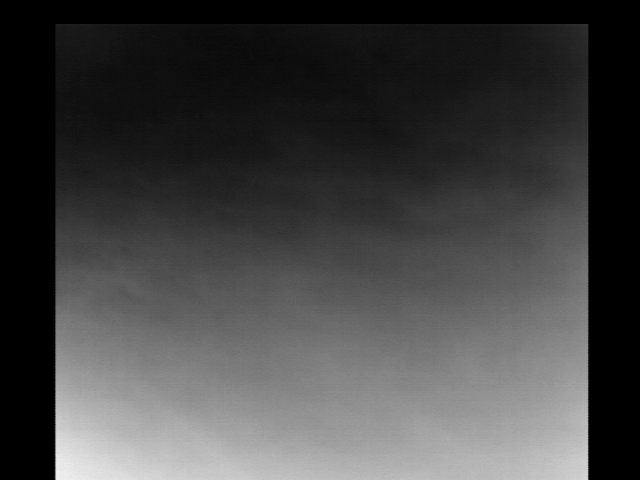

In [22]:
Image.open(sorted_filenames[0])

## Show images

In [23]:
def ShowMultipleImages():
    """
    ShowRawImages: Show the raw images without background subtraction
    ==============
    """
    #global all_images
    #global all_titles
    #global object_name

    NBIMAGES=len(sorted_filenames)
    NBIMGROWPERPAGE=5  # number of rows per pages
    PageNum=0          # page counter
    
    figfilename='cloudimg_'+object_name+'.pdf'
    
    pp = PdfPages(figfilename)
    
    
    title='Raw images of {}'.format(object_name)
    
    
    for index in np.arange(0,NBIMAGES):
        # create a new page
        if index%(NBIMGPERLROW*NBIMGROWPERPAGE) == 0:
            f, axarr = plt.subplots(NBIMGROWPERPAGE,NBIMGPERLROW,figsize=(25,30))
            f.suptitle(title,size=20)   
        indexcut=index-PageNum*(NBIMGROWPERPAGE*NBIMGPERLROW)    
        ix=indexcut%NBIMGPERLROW
        iy=indexcut/NBIMGPERLROW
        img = Image.open(sorted_filenames[index])
        iar_shp = np.array(img).shape
        img = img.convert('L')  ## ? Convert gray scale
        # Load grayscale matrix, reshape to dimensions of color bmp
        
        #print iar_shp, img
        
        #image= misc.imread(os.path.join(path,'image.bmp'), flatten= 0)
        #iarr = np.array(img.getdata()).reshape(iar_shp[0], iar_shp[1])
        iarr = np.array(img)
        im=axarr[iy,ix].imshow(iarr,origin='lower',cmap='gray')
        axarr[iy,ix].set_title(str(sorted_numbers[index]))
        axarr[iy,ix].grid(color='white', ls='solid')
        axarr[iy,ix].text(0,0,str(sorted_numbers[index]),verticalalignment='bottom', horizontalalignment='left',color='yellow', fontweight='bold',fontsize=16)
        # save a new page
        if (index+1)%(NBIMGPERLROW*NBIMGROWPERPAGE) == 0:
            PageNum+=1  # increase page Number
            f.savefig(pp, format='pdf')
            f.show()
            
    f.savefig(pp, format='pdf')
    pp.close()


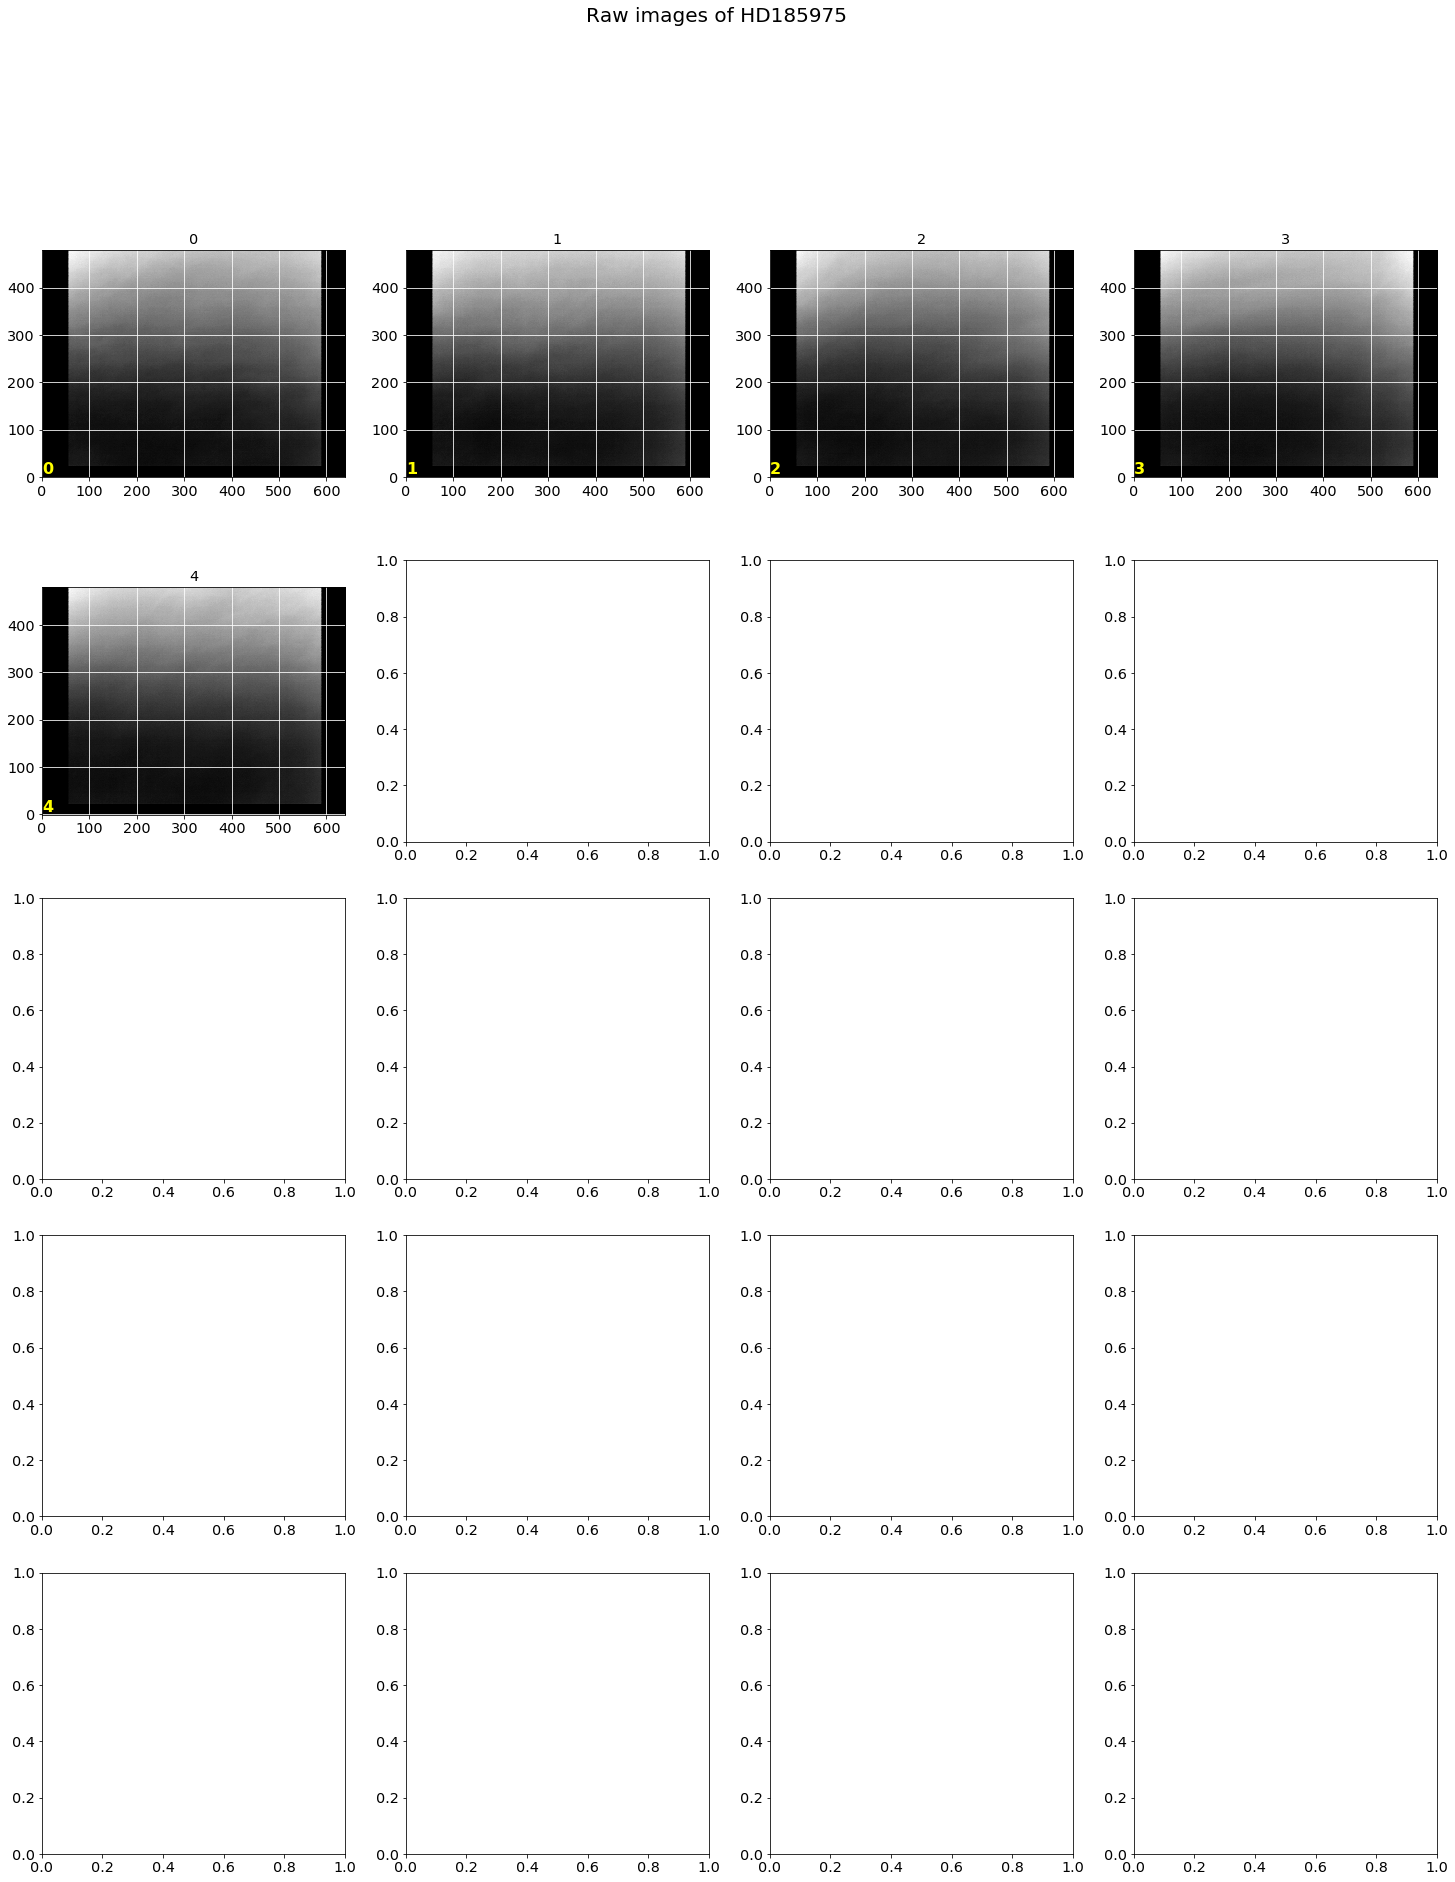

In [24]:
ShowMultipleImages()

## Show histograms

In [25]:
def ShowMultipleHistos():
    """
    ShowRawImages: Show the raw images without background subtraction
    ==============
    """
    #global all_images
    #global all_titles
    #global object_name

    NBIMAGES=len(sorted_filenames)
    NBIMGROWPERPAGE=5  # number of rows per pages
    PageNum=0          # page counter
    
    
    figfilename='cloudhisto'+object_name+'.pdf'
    pp = PdfPages(figfilename)
    
    title='Histograms of images of {}'.format(object_name)
    
    
    for index in np.arange(0,NBIMAGES):
        
        # create a new page
        if index%(NBIMGPERLROW*NBIMGROWPERPAGE) == 0:
            f, axarr = plt.subplots(NBIMGROWPERPAGE,NBIMGPERLROW,figsize=(25,30))
            plt.suptitle(title,size=20) 
            
        indexcut=index-PageNum*(NBIMGROWPERPAGE*NBIMGPERLROW)    
        ix=indexcut%NBIMGPERLROW
        iy=indexcut/NBIMGPERLROW
        
        img = Image.open(sorted_filenames[index])
        
        iar_shp = np.array(img).shape
        #iarr = np.array(img.getdata()).reshape(iar_shp[0], iar_shp[1])
        iarr = np.array(img)
        iarr_flat=iarr.flatten()
        iarr_cut=iarr_flat[np.where(iarr_flat>=1)]
        
        stat_mean=iarr_cut.mean()
        stat_rms=iarr_cut.std()
        
        legtitle='mean={:4.2f} std={:4.2f}'.format(stat_mean,stat_rms)
        n, bins, patches=axarr[iy,ix].hist(iarr.flatten(),bins=50,range=[1,260],facecolor='blue',alpha=0.75,histtype='stepfilled',label=legtitle)
        axarr[iy,ix].legend(loc='best')
        axarr[iy,ix].grid(color='red', ls='solid')
        axarr[iy,ix].text(0,0,str(sorted_numbers[index]),verticalalignment='bottom', horizontalalignment='left',color='red', fontweight='bold',fontsize=16)

        # save a new page
        if (index+1)%(NBIMGPERLROW*NBIMGROWPERPAGE) == 0:
            PageNum+=1  # increase page Number
            f.savefig(pp, format='pdf')
            f.show()
            
      
    
    f.savefig(pp, format='pdf')
    pp.close()
   

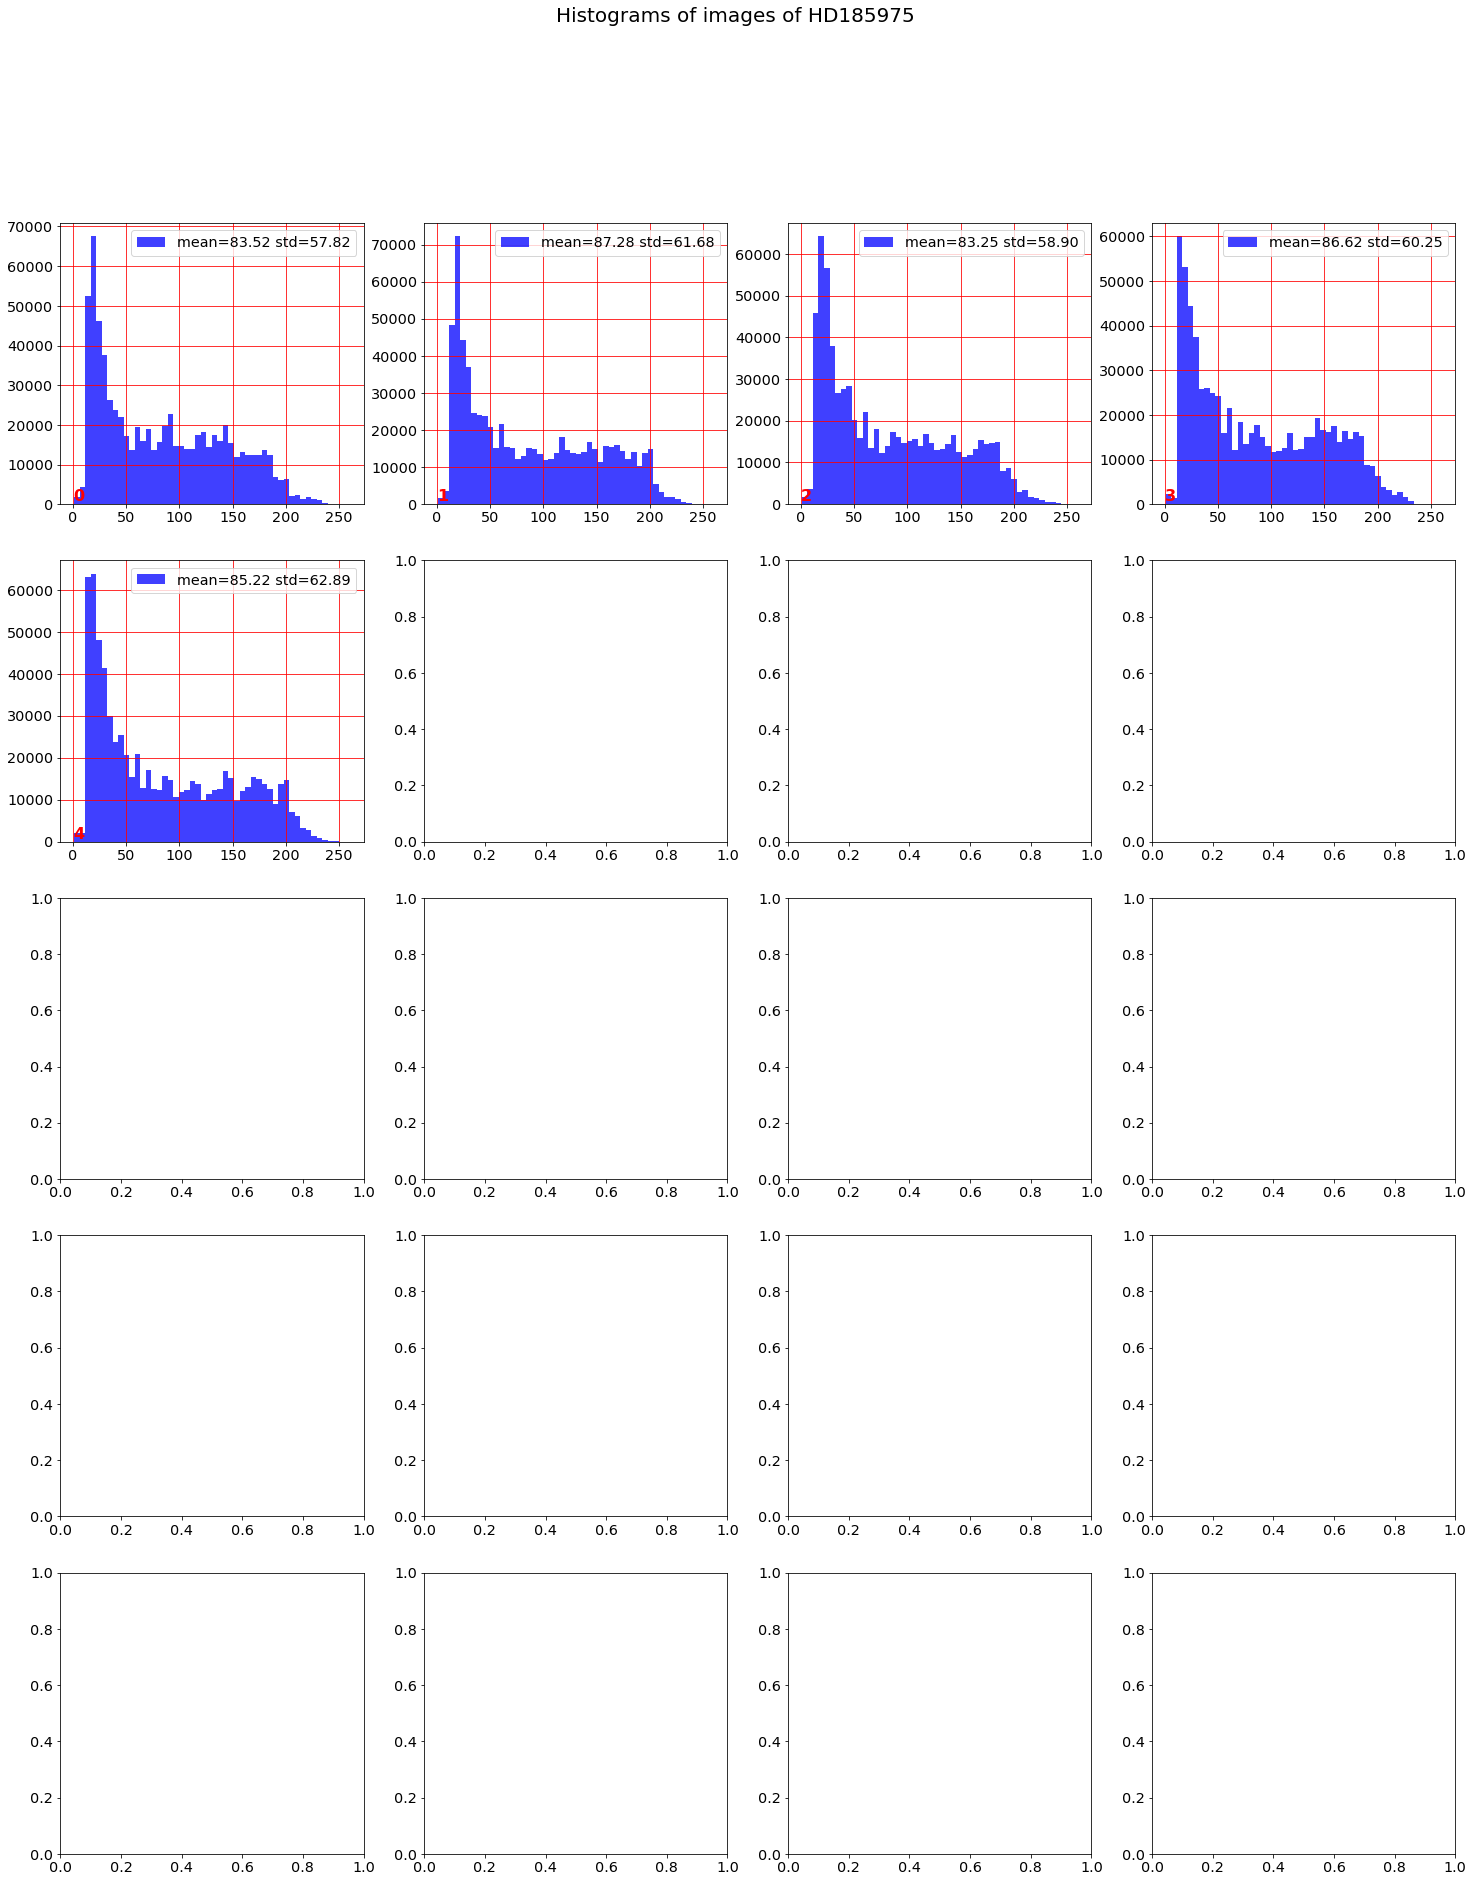

In [26]:
ShowMultipleHistos()